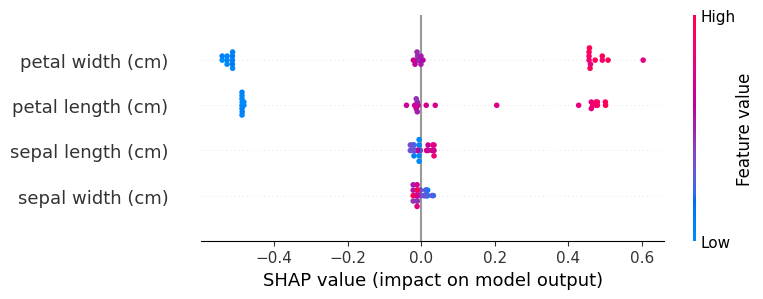

In [1]:
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from shap import partial_dependence_plot
# Wczytaj dane
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names

# Podziel dane na zestawy treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Trenuj model RandomForest
model = RandomForestRegressor(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# Utwórz obiekt Explainer SHAP dla danych testowych
explainer = shap.Explainer(model, X_test)

# Oblicz wartości SHAP
shap_values = explainer.shap_values(X_test)

# Wyświetl wykres SHAP dla pierwszej obserwacji
shap.summary_plot(shap_values, X_test, feature_names=feature_names)


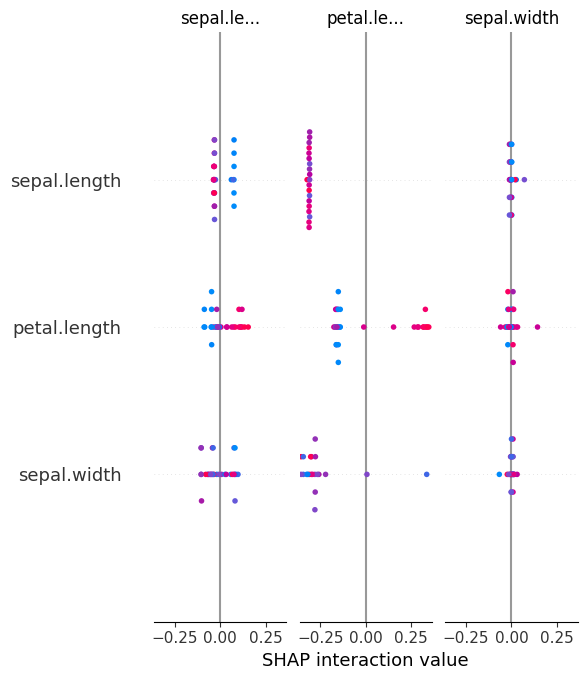

Class Setosa:


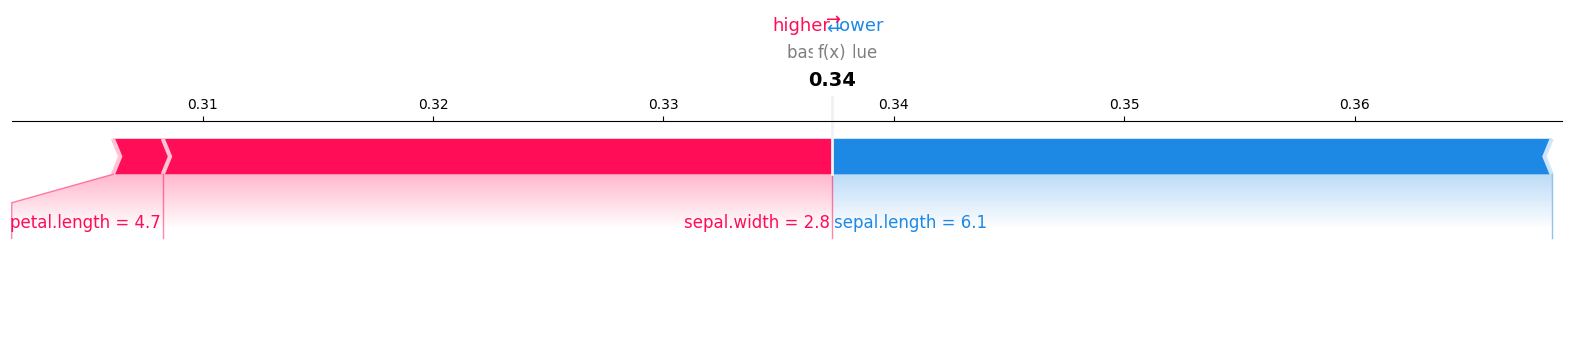

Class Versicolor:


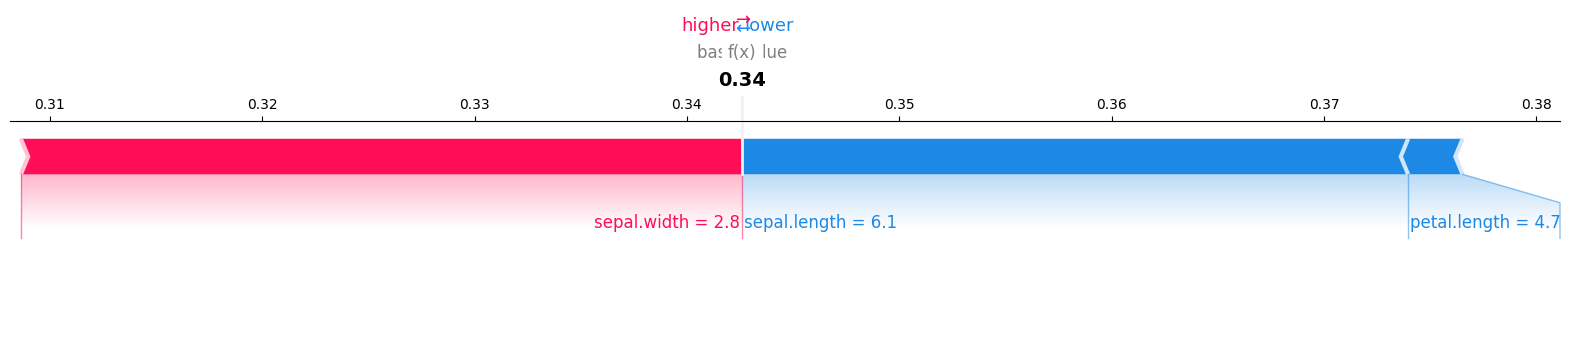

Class Virginica:


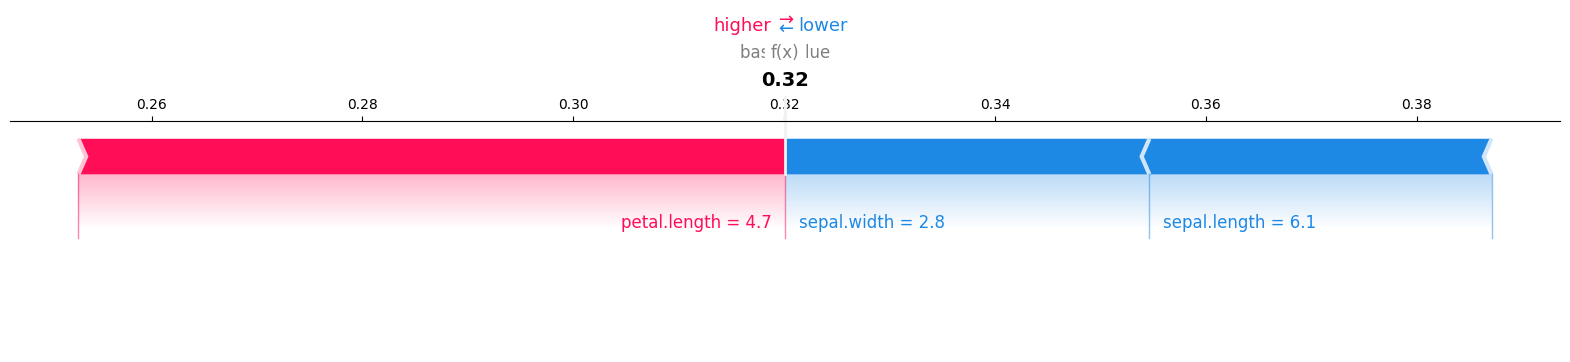

In [2]:
# Importowanie potrzebnych bibliotek
import shap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Wczytanie danych
iris = pd.read_csv('iris.csv')

# Podział danych na zmienne niezależne (X) i zależne (y)
X = iris.drop('species', axis=1)
y = iris['species']
class_names = ["Setosa", "Versicolor", "Virginica"]


# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Utworzenie i trenowanie modelu klasyfikacji
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Utworzenie obiektu explainera SHAP
explainer = shap.Explainer(model)

# Obliczenie wartości SHAP dla zbioru testowego
shap_values = explainer.shap_values(X_test)

# Wyświetlenie podsumowania wartości SHAP
# shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

# Generowanie force_plot dla wszystkich klas dla wybranej obserwacji
shap.initjs()
observation_index = 0
for class_index in range(len(class_names)):
    print(f"Class {class_names[class_index]}:")
    shap.force_plot(
        explainer.expected_value[class_index], 
        shap_values[class_index][observation_index], 
        X_test.iloc[observation_index, :-1],
        feature_names=X_test.columns[:-1],
        show=True,
        matplotlib=True,
        #link="logit"
    )



In [13]:
explainer = shap.explainers.Exact(model.predict_proba, X)
shap_values = explainer(X)

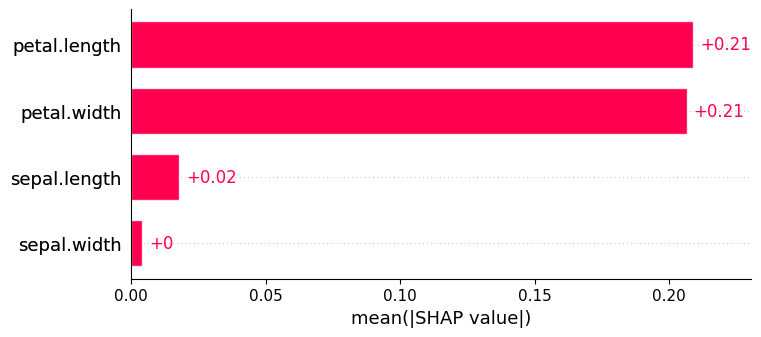

In [17]:
shap_values = shap_values[..., 0]
shap.plots.bar(shap_values)

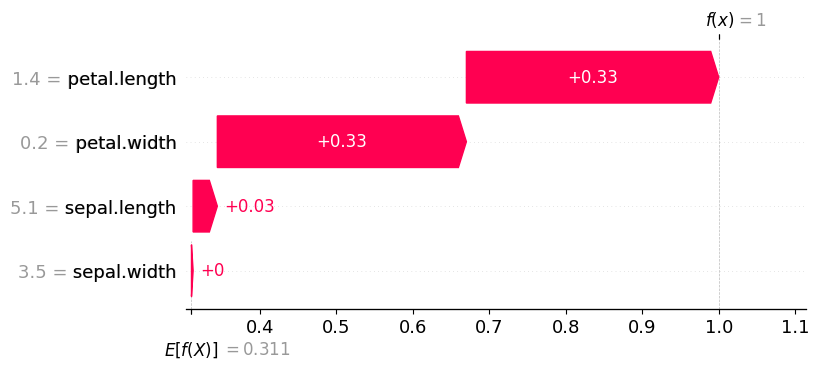

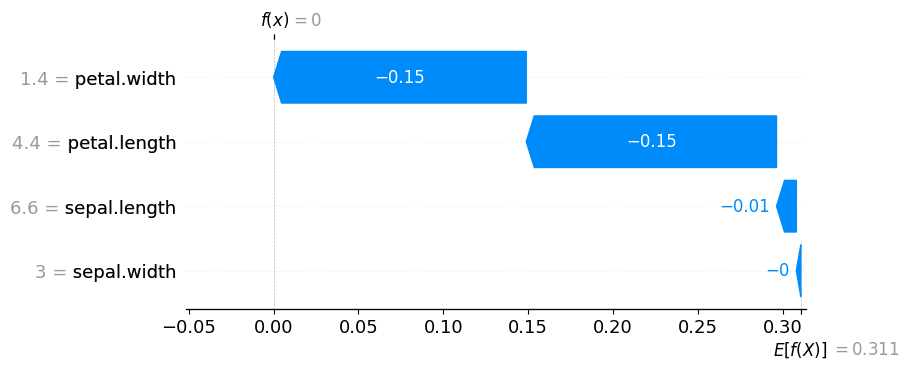

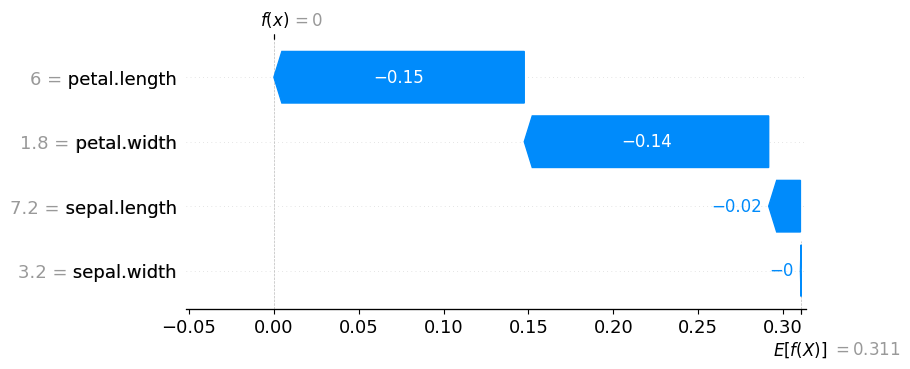

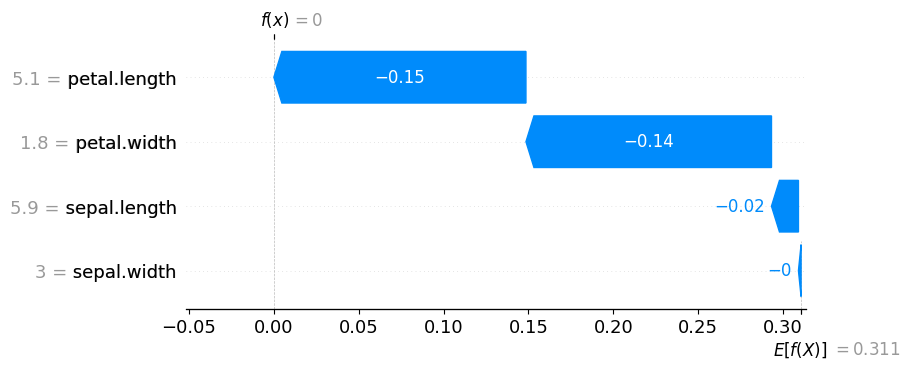

In [18]:

shap.plots.waterfall(shap_values[0])
shap.plots.waterfall(shap_values[75])
shap.plots.waterfall(shap_values[125])
shap.plots.waterfall(shap_values[149])

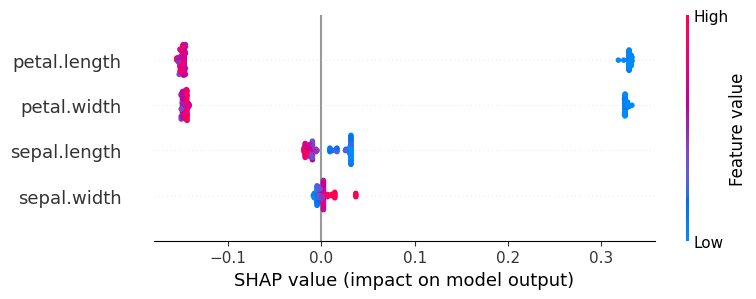

In [19]:
shap.summary_plot(shap_values)

In [25]:
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

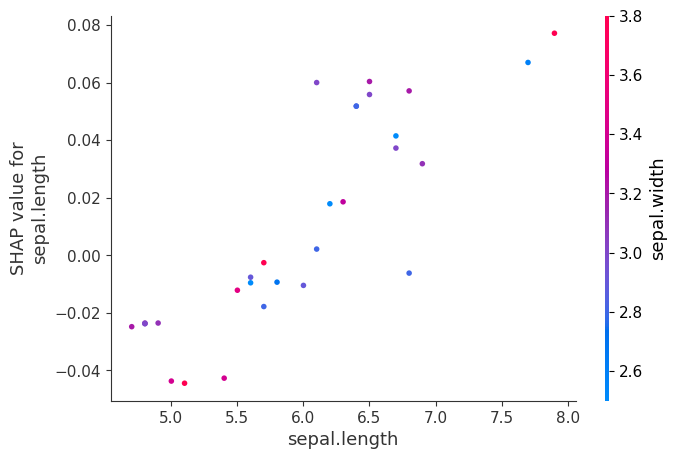

In [26]:
shap.dependence_plot("sepal.length", shap_values[:, :, 2], X_test,interaction_index="sepal.width")

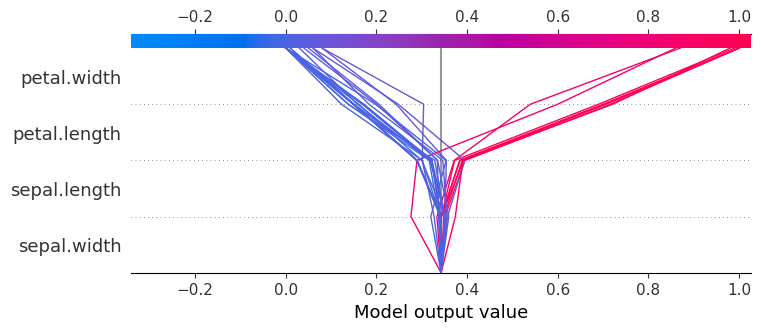

In [27]:
shap.decision_plot(explainer.expected_value[1], shap_values[:, :, 1], X_test.columns)